# **1. LIBRARY**

In [13]:
import os
import pickle
import zipfile
import random
import cv2
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from keras.saving import load_model

In [3]:
def random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    keras.utils.set_random_seed(seed)

    os.environ["PYTHONHASHSEED"] = "42"

In [4]:
random_seed(42)

# **2. METRIC**

In [5]:
def fdr(y_true, y_pred):
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    fdr_ = FP / (FP + TP) if (FP + TP) > 0 else 0
    
    return fdr_

In [6]:
def fnr(y_true, y_pred):
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    fnr_ = FN / (FN + TP) if (FN + TP) > 0 else 0
    
    return fnr_

In [7]:
def specificity(y_true, y_pred):
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    specificity_ = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    return specificity_

In [8]:
def npv(y_true, y_pred):
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    npv_ = TN / (TN + FN) if (TN + FN) > 0 else 0
    
    return npv_

# **3. VGG16 - MLP**

## **3.1. Dataset**

In [32]:
test_cxr = pd.read_csv('/kaggle/input/pneumonia-detection-features-datasets/test/cxr.csv')
test_ch0 = pd.read_csv('/kaggle/input/pneumonia-detection-features-datasets/test/segment.csv')
test_ch1 = pd.read_csv('/kaggle/input/pneumonia-detection-features-datasets/test/segment_with_convexhull.csv')

In [33]:
x_test_cxr = test_cxr.drop(['class'], axis=1).to_numpy()
x_test_ch0 = test_ch0.drop(['class'], axis=1).to_numpy()
x_test_ch1 = test_ch1.drop(['class'], axis=1).to_numpy()
y_test = test_cxr['class'].to_numpy()

print(np.shape(x_test_cxr))
print(np.shape(x_test_ch0))
print(np.shape(x_test_ch1))
print(np.shape(y_test))

(624, 8192)
(624, 8192)
(624, 8192)
(624,)


## **3.2. Model**

### **3.2.1. Chest X-ray**

In [34]:
model_cxr = load_model('/kaggle/input/pneumonia-detection-model/keras/default/3/CXR/model/model.h5')

In [36]:
y_pred = model_cxr.predict(x_test_cxr, verbose=False)
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

print('accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('precision = {}'.format(precision_score(y_test, y_pred)))
print('FDR = {}'.format(fdr(y_test, y_pred)))
print('recall = {}'.format(recall_score(y_test, y_pred)))
print('FNR = {}'.format(fnr(y_test, y_pred)))
print('specificity = {}'.format(specificity(y_test, y_pred)))
print('NPV = {}'.format(npv(y_test, y_pred)))
print('f1-score = {}'.format(f1_score(y_test, y_pred)))
print('AUC = {}'.format(roc_auc_score(y_test, y_pred)))
print('MCC = {}'.format(matthews_corrcoef(y_test, y_pred)))

accuracy = 0.9182692307692307
precision = 0.9312977099236641
FDR = 0.06870229007633588
recall = 0.9384615384615385
FNR = 0.06153846153846154
specificity = 0.8846153846153846
NPV = 0.8961038961038961
f1-score = 0.9348659003831418
AUC = 0.9115384615384615
MCC = 0.8252364315988896


### **3.2.2. Segment**

In [37]:
model_ch0 = load_model('/kaggle/input/pneumonia-detection-model/keras/default/3/CH0/model/model.h5')

In [38]:
y_pred = model_ch0.predict(x_test_ch0, verbose=False)
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

print('accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('precision = {}'.format(precision_score(y_test, y_pred)))
print('FDR = {}'.format(fdr(y_test, y_pred)))
print('recall = {}'.format(recall_score(y_test, y_pred)))
print('FNR = {}'.format(fnr(y_test, y_pred)))
print('specificity = {}'.format(specificity(y_test, y_pred)))
print('NPV = {}'.format(npv(y_test, y_pred)))
print('f1-score = {}'.format(f1_score(y_test, y_pred)))
print('AUC = {}'.format(roc_auc_score(y_test, y_pred)))
print('MCC = {}'.format(matthews_corrcoef(y_test, y_pred)))

accuracy = 0.8926282051282052
precision = 0.8929440389294404
FDR = 0.1070559610705596
recall = 0.941025641025641
FNR = 0.05897435897435897
specificity = 0.811965811965812
NPV = 0.892018779342723
f1-score = 0.916354556803995
AUC = 0.8764957264957265
MCC = 0.7688109605585902


### **3.2.3. Segment - Convex Hull**

In [39]:
model_ch1 = load_model('/kaggle/input/pneumonia-detection-model/keras/default/3/CH1/model/model.h5')

In [40]:
y_pred = model_ch1.predict(x_test_ch1, verbose=False)
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

print('accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('precision = {}'.format(precision_score(y_test, y_pred)))
print('FDR = {}'.format(fdr(y_test, y_pred)))
print('recall = {}'.format(recall_score(y_test, y_pred)))
print('FNR = {}'.format(fnr(y_test, y_pred)))
print('specificity = {}'.format(specificity(y_test, y_pred)))
print('NPV = {}'.format(npv(y_test, y_pred)))
print('f1-score = {}'.format(f1_score(y_test, y_pred)))
print('AUC = {}'.format(roc_auc_score(y_test, y_pred)))
print('MCC = {}'.format(matthews_corrcoef(y_test, y_pred)))

accuracy = 0.8894230769230769
precision = 0.8741258741258742
FDR = 0.1258741258741259
recall = 0.9615384615384616
FNR = 0.038461538461538464
specificity = 0.7692307692307693
NPV = 0.9230769230769231
f1-score = 0.9157509157509157
AUC = 0.8653846153846154
MCC = 0.7632635684211367


# **4. VGG16 - Transfer Learning**

## **4.1. Dataset**

In [9]:
img_size = 128

In [10]:
x_test_cxr = np.load('/kaggle/input/pneumonia-detection-datasets/chest-xray/test/images.npy')
x_test_ch0 = np.load('/kaggle/input/pneumonia-detection-datasets/segment/test/images.npy')
x_test_ch1 = np.load('/kaggle/input/pneumonia-detection-datasets/segment_with_convexhull/test/images.npy')
y_test = np.load('/kaggle/input/pneumonia-detection-datasets/chest-xray/test/labels.npy')

print(np.shape(x_test_cxr))
print(np.shape(x_test_ch0))
print(np.shape(x_test_ch1))
print(np.shape(y_test))

(624, 128, 128, 1)
(624, 128, 128, 1)
(624, 128, 128, 1)
(624,)


In [11]:
x_test_cxr = x_test_cxr.reshape(-1, img_size, img_size)
x_test_rgb_cxr = np.stack((x_test_cxr,) * 3, axis=-1)
x_test_ch0 = x_test_ch0.reshape(-1, img_size, img_size)
x_test_rgb_ch0 = np.stack((x_test_ch0,) * 3, axis=-1)
x_test_ch1 = x_test_ch1.reshape(-1, img_size, img_size)
x_test_rgb_ch1 = np.stack((x_test_ch1,) * 3, axis=-1)

print(np.shape(x_test_rgb_cxr))
print(np.shape(x_test_rgb_ch0))
print(np.shape(x_test_rgb_ch1))
print(np.shape(y_test))

(624, 128, 128, 3)
(624, 128, 128, 3)
(624, 128, 128, 3)
(624,)


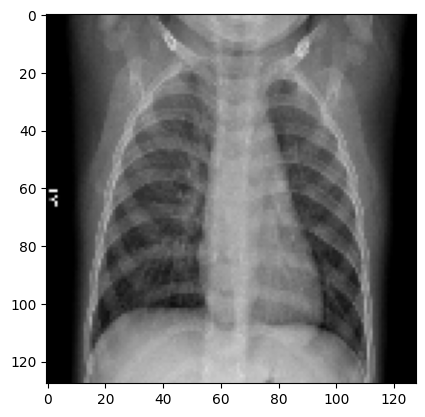

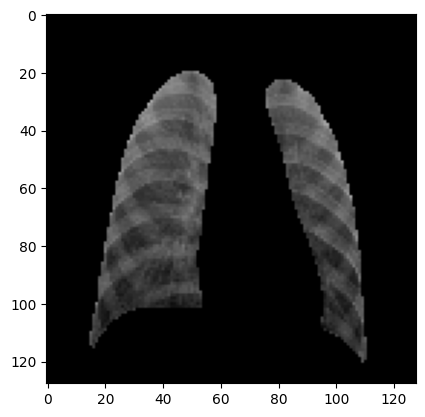

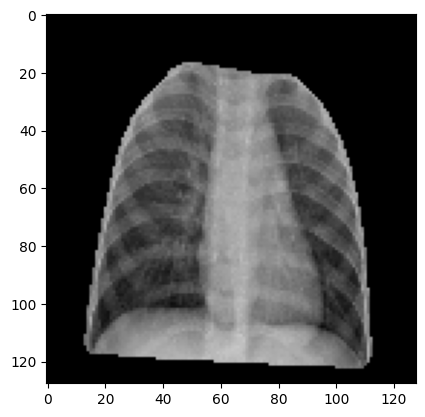

In [12]:
idx = 9
plt.imshow(x_test_rgb_cxr[idx])
plt.show()
plt.imshow(x_test_rgb_ch0[idx], cmap='gray')
plt.show()
plt.imshow(x_test_rgb_ch1[idx], cmap='gray')
plt.show()

## **4.2. Model**

### **4.2.1. Chest X-ray**

In [14]:
model_cxr = load_model('/kaggle/input/pneumonia-detection-model/keras/default/1/CXR/model/model.h5')

In [19]:
y_pred = model_cxr.predict(x_test_rgb_cxr, verbose=False)
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

print('accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('precision = {}'.format(precision_score(y_test, y_pred)))
print('FDR = {}'.format(fdr(y_test, y_pred)))
print('recall = {}'.format(recall_score(y_test, y_pred)))
print('FNR = {}'.format(fnr(y_test, y_pred)))
print('specificity = {}'.format(specificity(y_test, y_pred)))
print('NPV = {}'.format(npv(y_test, y_pred)))
print('f1-score = {}'.format(f1_score(y_test, y_pred)))
print('AUC = {}'.format(roc_auc_score(y_test, y_pred)))
print('MCC = {}'.format(matthews_corrcoef(y_test, y_pred)))

accuracy = 0.9439102564102564
precision = 0.9448621553884712
FDR = 0.05513784461152882
recall = 0.9666666666666667
FNR = 0.03333333333333333
specificity = 0.905982905982906
NPV = 0.9422222222222222
f1-score = 0.9556400506970849
AUC = 0.9363247863247863
MCC = 0.8798373730560005


### **4.2.2. Segment**

In [21]:
model_ch0 = load_model('/kaggle/input/pneumonia-detection-model/keras/default/1/CH0/model/model.h5')

In [22]:
y_pred = model_ch0.predict(x_test_rgb_ch0, verbose=False)
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

print('accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('precision = {}'.format(precision_score(y_test, y_pred)))
print('FDR = {}'.format(fdr(y_test, y_pred)))
print('recall = {}'.format(recall_score(y_test, y_pred)))
print('FNR = {}'.format(fnr(y_test, y_pred)))
print('specificity = {}'.format(specificity(y_test, y_pred)))
print('NPV = {}'.format(npv(y_test, y_pred)))
print('f1-score = {}'.format(f1_score(y_test, y_pred)))
print('AUC = {}'.format(roc_auc_score(y_test, y_pred)))
print('MCC = {}'.format(matthews_corrcoef(y_test, y_pred)))

accuracy = 0.9262820512820513
precision = 0.927860696517413
FDR = 0.07213930348258707
recall = 0.9564102564102565
FNR = 0.04358974358974359
specificity = 0.8760683760683761
NPV = 0.9234234234234234
f1-score = 0.9419191919191919
AUC = 0.9162393162393163
MCC = 0.8418288662306155


### **4.2.3. Segment - Convex Hull**

In [23]:
model_ch1 = load_model('/kaggle/input/pneumonia-detection-model/keras/default/1/CH1/model/model.h5')

In [24]:
y_pred = model_ch1.predict(x_test_rgb_ch1, verbose=False)
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

print('accuracy = {}'.format(accuracy_score(y_test, y_pred)))
print('precision = {}'.format(precision_score(y_test, y_pred)))
print('FDR = {}'.format(fdr(y_test, y_pred)))
print('recall = {}'.format(recall_score(y_test, y_pred)))
print('FNR = {}'.format(fnr(y_test, y_pred)))
print('specificity = {}'.format(specificity(y_test, y_pred)))
print('NPV = {}'.format(npv(y_test, y_pred)))
print('f1-score = {}'.format(f1_score(y_test, y_pred)))
print('AUC = {}'.format(roc_auc_score(y_test, y_pred)))
print('MCC = {}'.format(matthews_corrcoef(y_test, y_pred)))

accuracy = 0.9391025641025641
precision = 0.9334975369458128
FDR = 0.0665024630541872
recall = 0.9717948717948718
FNR = 0.028205128205128206
specificity = 0.8846153846153846
NPV = 0.9495412844036697
f1-score = 0.9522613065326633
AUC = 0.9282051282051282
MCC = 0.8696226212628791
